# Задание: Размер случайного леса

https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/programming/57ezh/razmier-sluchainogho-liesa

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([-3, 1, 10])
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X, y)
p = clf.predict(X)
p

array([-1.32,  0.36,  7.32])

In [5]:
from sklearn.metrics import r2_score
r2_score([10, 11, 12], [9, 11, 12.1])

0.495

In [7]:
r2_score(y, p)

0.88254436090225563

В этом задании вам нужно проследить за изменением качества случайного леса в зависимости от количества деревьев в нем.

1 Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [13]:
from pandas import read_csv
xd = read_csv('abalone.csv')

In [10]:
xd

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


2 Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1.

In [14]:
xd['Sex'] = xd['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

3 Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

In [15]:
y = xd['Rings']
x = xd.drop(['Rings'], axis=1)

In [21]:
from sklearn.cross_validation import KFold, cross_val_score as cvs
kf = KFold(y.size, n_folds=5, shuffle=True, random_state=1)
from sklearn.ensemble import RandomForestRegressor as RFR
t = lambda i: cvs(RFR(n_estimators=i, random_state=1), x, y, cv=kf, scoring = 'r2').mean()

CPU times: user 1min 27s, sys: 687 ms, total: 1min 28s
Wall time: 1min 30s
Populating the interactive namespace from numpy and matplotlib


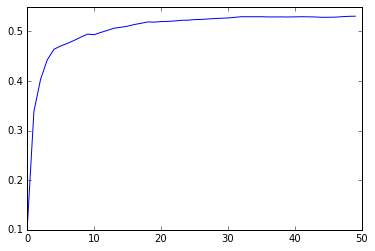

In [70]:
from tqdm import tqdm
import pandas as pd
%time s = pd.Series([t(i) for i in tqdm(range(1,51))])
%pylab inline
plot(s)

In [ ]:
import sys
sys.path.append('../..')
from lib import *
sr = s.round(2) # Глюк курсеры
pf('c0_w5_s1', sr[sr>0.52].index[0])

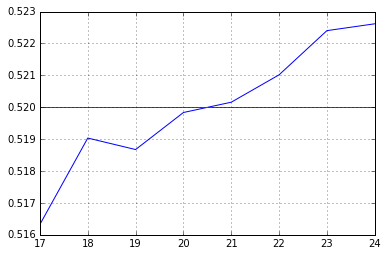

In [111]:
plot(s[(s>0.5155) & (s<0.523)])
grid()
axhline(y=0.52, c='r')